<p align="center">
  <a href="https://imsalione.ir/archives/260">
    <img src="https://imsalione.ir/wp-content/uploads/2024/08/Tumbnail-1280x624.png" alt="imsalione" style="border-radius: 10px; width: 700px" />
  </a>
</p>

<section style="direction: rtl; text-align: justify; margin: 0px 50px 0px 50px;">

### **بیان مسأله**

دیابت یکی از شایع‌ترین بیماری‌ها در دنیاست که هر ساله بر زندگی میلیون‌ها نفر تأثیر می‌گذارد و بار مالی قابل توجهی را بر اقتصاد کشورها به دنبال دارد. دیابت یک بیماری مزمن و پیش‌رونده است که در آن افراد قابلیت تنظیم سطح قند خون را به خوبی از دست می‌دهند. این وضعیت در نهایت منجر به کاهش کیفیت زندگی و کاهش امید به زندگی می‌شود. پس از تجزیه غذاهای مختلف به قندها در طول فرآیند هضم، قند وارد خون می‌شود. این عمل باعث می‌شود که غده پانکراس انسولین آزاد کند تا سلول‌ها بتوانند از قند موجود در خون برای تولید انرژی استفاده ‌کنند. دیابت به عدم تولید کافی انسولین یا ناتوانی بدن در استفاده از انسولین برای تبدیل قند خون به انرژی اتلاق می‌شود. عوارضی همچون بیماری‌های قلبی، از دست دادن دید، قطع اندام‌های پایین در نتیجه‌ی بریدگی، بیماری‌های کلیوی و موارد دیگر همگی ناشی از سطوح بالای قند خون در افراد دیابتی است. برای دیابت هیچ درمان مشخصی وجود ندارد. با این حال راهکارهایی مانند از دست‌دادن وزن، تغذیه سالم، فعالیت بدنی و دریافت درمان‌های پزشکی در کاهش آسیب‌های بیماری و کنترل آن نقش مهمی ایفا می‌کنند. تشخیص زودهنگام می‌تواند منجر به تغییرات سبک زندگی مبتلایان و درمان‌های موثر‌تر شود. بنابراین مدل‌های پیش‌بینی خطر دیابت، ابزارهای بسیار مهمی برای ارتقای آگاهی جامعه و مسئولان بهداشت و سلامت عمومی در کشورها است. بر اساس اعلام مرکز کنترل و پیشگیری بیماری‌های آمریکا (CDC) تا سال ۲۰۱۸، ۳۴/۲ میلیون آمریکایی دیابت دارند و 88 میلیون نفر نیز پیش‌دیابت دارند. علاوه بر این، CDC برآورد می‌کند که ۱ نفر از هر ۵ نفر دیابتی، و تقریبا ۸ نفر از هر ۱۰ نفر پیش‌دیابتی از وضعیت خود اطلاعی ندارند. در حالی که انواع مختلفی از دیابت وجود دارد، دیابت نوع دوم شایع‌ترین نوع آن است و شیوع آن بستگی به سن، تحصیلات، درآمد، محل زندگی، نژاد و سایر عوامل تعیین‌کننده‌ی اجتماعی سلامت دارد. بار بیماری بیشتر بر دوش افراد با وضعیت اقتصادی پایین است. دیابت همچنین بار سنگینی را بر اقتصاد به دنبال دارد. مجموع هزینه‌‌ی افراد تشخیص‌داده شده به دیابت تقریبا ۳۲۷ میلیارد دلار، و هزینه‌های کل به همراه افراد دیابتی تشخیص داده نشده و و افراد پیش‌دیابتی در حدود سالانه ۴۰۰ میلیارد دلار برآورد می‌شود. 

برای این منظور می‌خواهیم سامانه‌ای ایجاد کنیم که اطلاعاتی درباره وضعیت کاربر را از وی دریافت کند و خطر ابتلا به دیابت را به وی گزارش کند. این سامانه به یک مدل برای پیش‌بینی دیابت نیاز دارد. در این پروژه می‌خواهیم این مدل را با استفاده از داده‌هایی که در اختیار داریم ایجاد کنیم.

</section>

***
## **Step 1** 
### **Loading Dataset and Checking its Dimensions**

In [1]:
import os
import pandas as pd

# Defining the file path
file_path = os.path.join("src", "diabetes.csv")

# Reading the CSV file using the absolute path
df = pd.read_csv(file_path)

# Printing the absolute file path and the dimensions of the dataset
print(f"File path: {file_path}")
print("Dataset shape:", df.shape)

File path: src/diabetes.csv
Dataset shape: (253680, 22)


***
## **Step 2** 
### **Checking for Missing Data in the Dataset**

In [2]:
import pandas as pd

# Calculate the number of missing and non-missing data in each column
missing_summary = df.isnull().sum().to_frame('Missing Values')
missing_summary['Percentage'] = (missing_summary['Missing Values'] / len(df)) * 100
total_non_missing_data = df.count().sum()

# Add column data types to the summary
missing_summary['Data Type'] = df.dtypes

# Reset index to make the column names a regular column
missing_summary = missing_summary.reset_index()
missing_summary = missing_summary.rename(columns={'index': 'Column Name'})

# Filter and sort the DataFrame if there are any missing values
if missing_summary['Missing Values'].any():
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
    print(f"Total Missing Data: {missing_summary['Missing Values'].sum()}")
    print("-" * 50)
    print("Summary of Missing Data:")
    print(missing_summary.to_string(index=False))
else:
    print("No missing data found!")
    print("-" * 50)
    print(f"Total Non-Missing Data: {total_non_missing_data}")

No missing data found!
--------------------------------------------------
Total Non-Missing Data: 5580960


***
## **Step 3** 
### **Analyzing Frequency and Distribution of the Target Variable**

In [3]:
# Calculate frequency and percentage distribution in one go
diabetes_stats = df['Diabetes_012'].value_counts().to_frame('Frequency')
diabetes_stats['Percentage'] = (diabetes_stats['Frequency'] / len(df) * 100).round(2)

# Format the output
pd.options.display.float_format = '{:.2f}'.format

# Print the results
print("\nDiabetes Statistics:")
print(diabetes_stats)

print("\nFeatures:")
print(df.columns.tolist())


Diabetes Statistics:
              Frequency  Percentage
Diabetes_012                       
0.00             213703       84.24
2.00              35346       13.93
1.00               4631        1.83

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


***
## **Step 4** 
### **Reclassifying Target Variable into Binary Classes**


Distribution of Binary Diabetes Target:
+-------------+------------+--------+
|  Diabetes   | Percentage | Count  |
+-------------+------------+--------+
| No Diabetes |   84.24    | 213703 |
|  Diabetes   |   15.76    | 39977  |
+-------------+------------+--------+


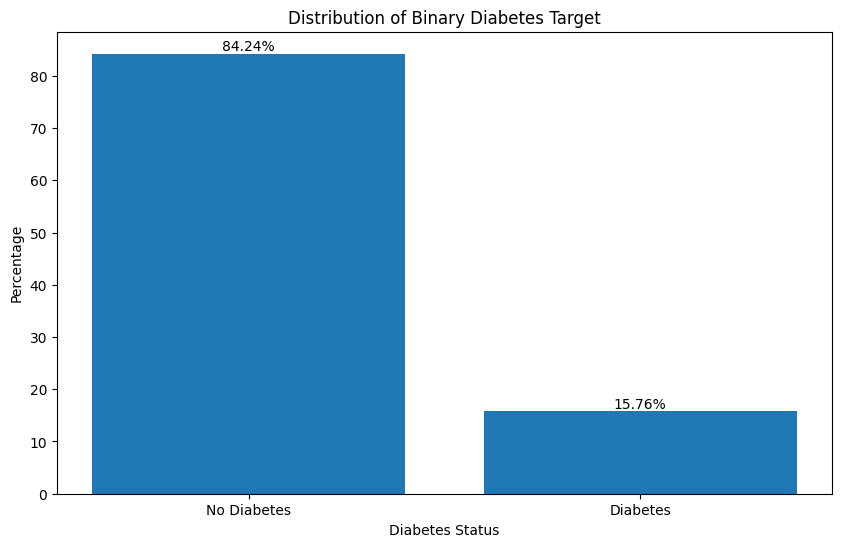

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Combine the 'Pre-diabetes' (1) and 'Diabetes' (2) classes into a single 'Diabetes' class
df['Diabetes_Binary'] = (df['Diabetes_012'] > 0).astype(int)

# Calculate the distribution of the new target variable
diabetes_binary_stats = df['Diabetes_Binary'].value_counts(normalize=True).mul(100).round(2).to_frame('Percentage')
diabetes_binary_stats['Count'] = df['Diabetes_Binary'].value_counts()
diabetes_binary_stats = diabetes_binary_stats.rename_axis('Diabetes').reset_index()
diabetes_binary_stats['Diabetes'] = diabetes_binary_stats['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Print the results in a table format
print("\nDistribution of Binary Diabetes Target:")
print(tabulate(diabetes_binary_stats, headers='keys', tablefmt='pretty', showindex=False))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(diabetes_binary_stats['Diabetes'], diabetes_binary_stats['Percentage'])
plt.title('Distribution of Binary Diabetes Target')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage')
for i, v in enumerate(diabetes_binary_stats['Percentage']):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

***
## **Step 5** 
### **Correlation Analysis of Features with Target Variable**

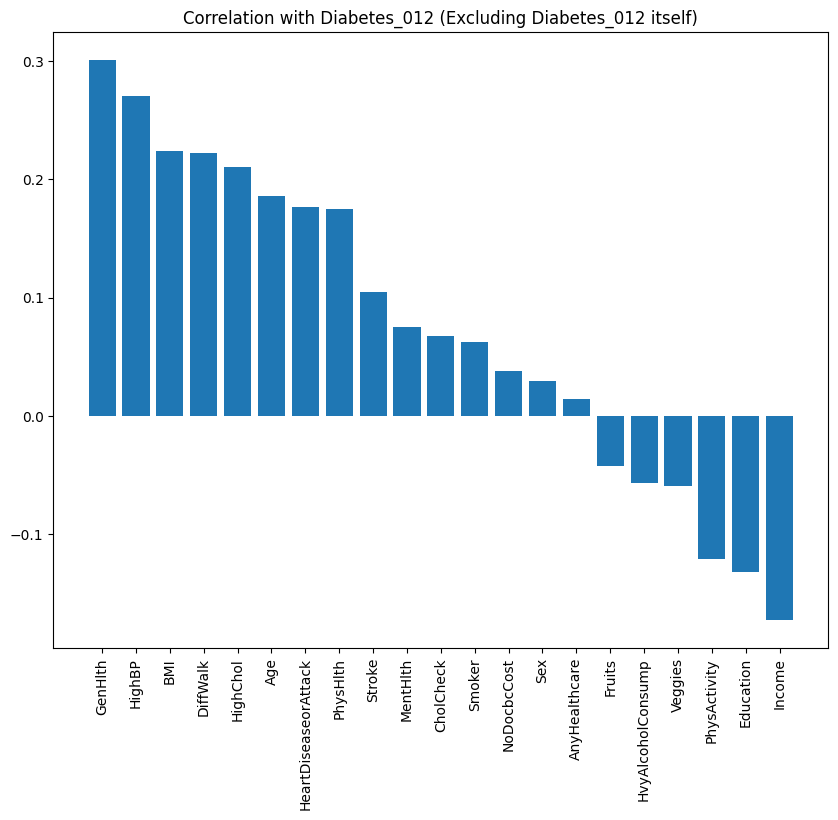

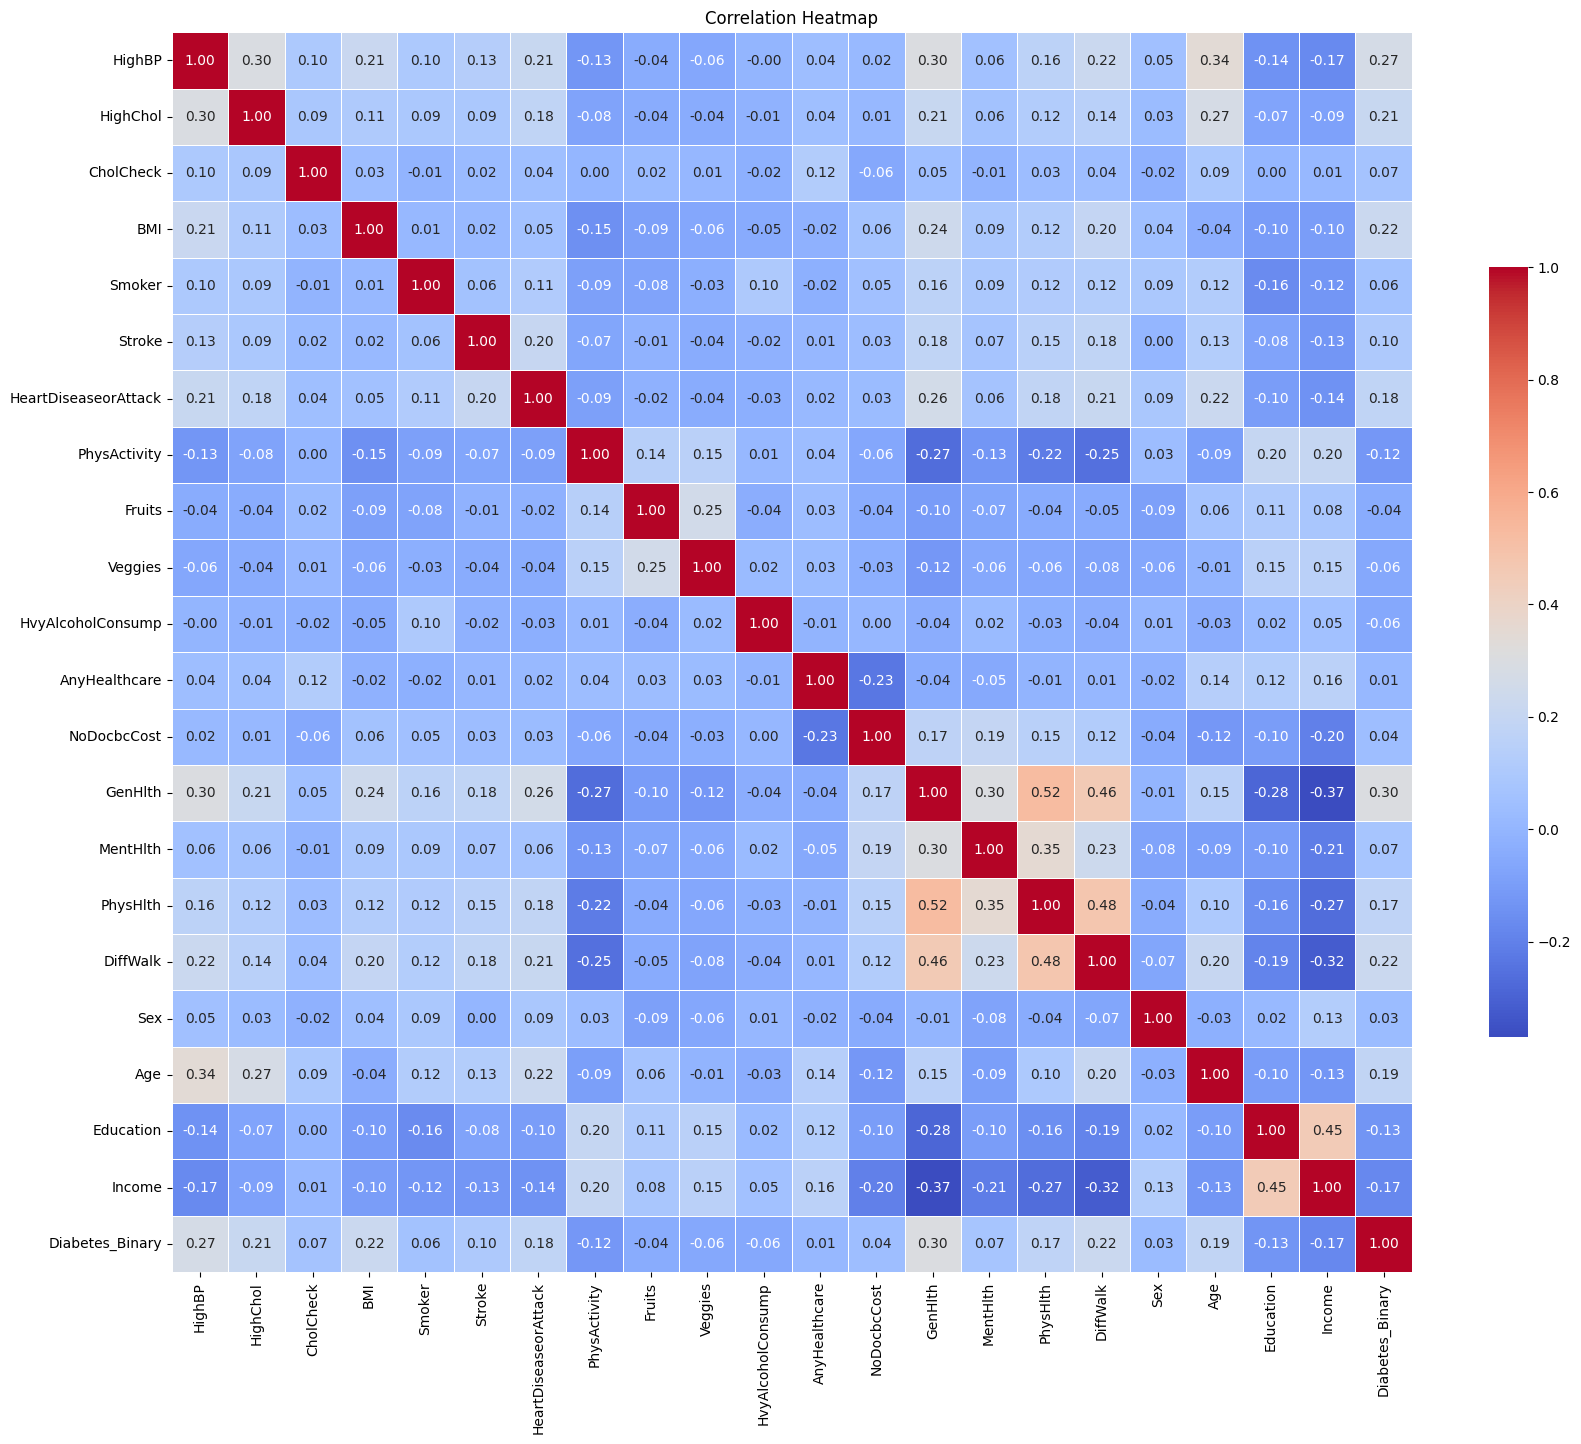

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the dimensions of the plot
plt.figure(figsize=(10, 8))

# Calculating the correlation using Pearson correlation coefficient
correlation_matrix = df.corr(method="pearson")
correlation_with_target = correlation_matrix["Diabetes_Binary"].drop(["Diabetes_012", "Diabetes_Binary"]).sort_values(ascending=False)

# Plotting the bar chart
plt.bar(correlation_with_target.index, correlation_with_target)
plt.xticks(rotation=90)
plt.title("Correlation with Diabetes_012 (Excluding Diabetes_012 itself)")
plt.show()

# Displaying the heatmap of correlations between all features
plt.figure(figsize=(20, 20))
sns.heatmap(
    correlation_matrix.drop(["Diabetes_012"], axis=1).drop(["Diabetes_012"], axis=0),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5}
)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
print(correlation_with_target)

GenHlth                 0.30
HighBP                  0.27
BMI                     0.22
DiffWalk                0.22
HighChol                0.21
Age                     0.19
HeartDiseaseorAttack    0.18
PhysHlth                0.17
Stroke                  0.10
MentHlth                0.07
CholCheck               0.07
Smoker                  0.06
NoDocbcCost             0.04
Sex                     0.03
AnyHealthcare           0.01
Fruits                 -0.04
HvyAlcoholConsump      -0.06
Veggies                -0.06
PhysActivity           -0.12
Education              -0.13
Income                 -0.17
Name: Diabetes_Binary, dtype: float64


***
## **Step 6** 
### **Feature Selection Based on Correlation Threshold**

In [14]:
import pandas as pd

# Calculating the correlation with the target using Pearson correlation coefficient
correlation_with_target = df.corr(method="pearson")["Diabetes_Binary"]

# Setting a threshold for correlation
threshold = 0.05

# Selecting and dropping features with correlation less than the threshold
low_correlation_features = correlation_with_target[abs(correlation_with_target) < threshold].index
df_filtered = df.drop(columns=low_correlation_features).drop(["Diabetes_012", "Diabetes_Binary"], axis=1)

# Displaying the names of removed features and the columns of the filtered DataFrame
print("Features with low correlation (removed):", low_correlation_features.tolist())
print("\nFiltered DataFrame columns:", df_filtered.columns.tolist())

Features with low correlation (removed): ['Fruits', 'AnyHealthcare', 'NoDocbcCost', 'Sex']

Filtered DataFrame columns: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


***
## **Step 7** 
### **Visualizing the Distribution of Health Features by Diabetes Status**

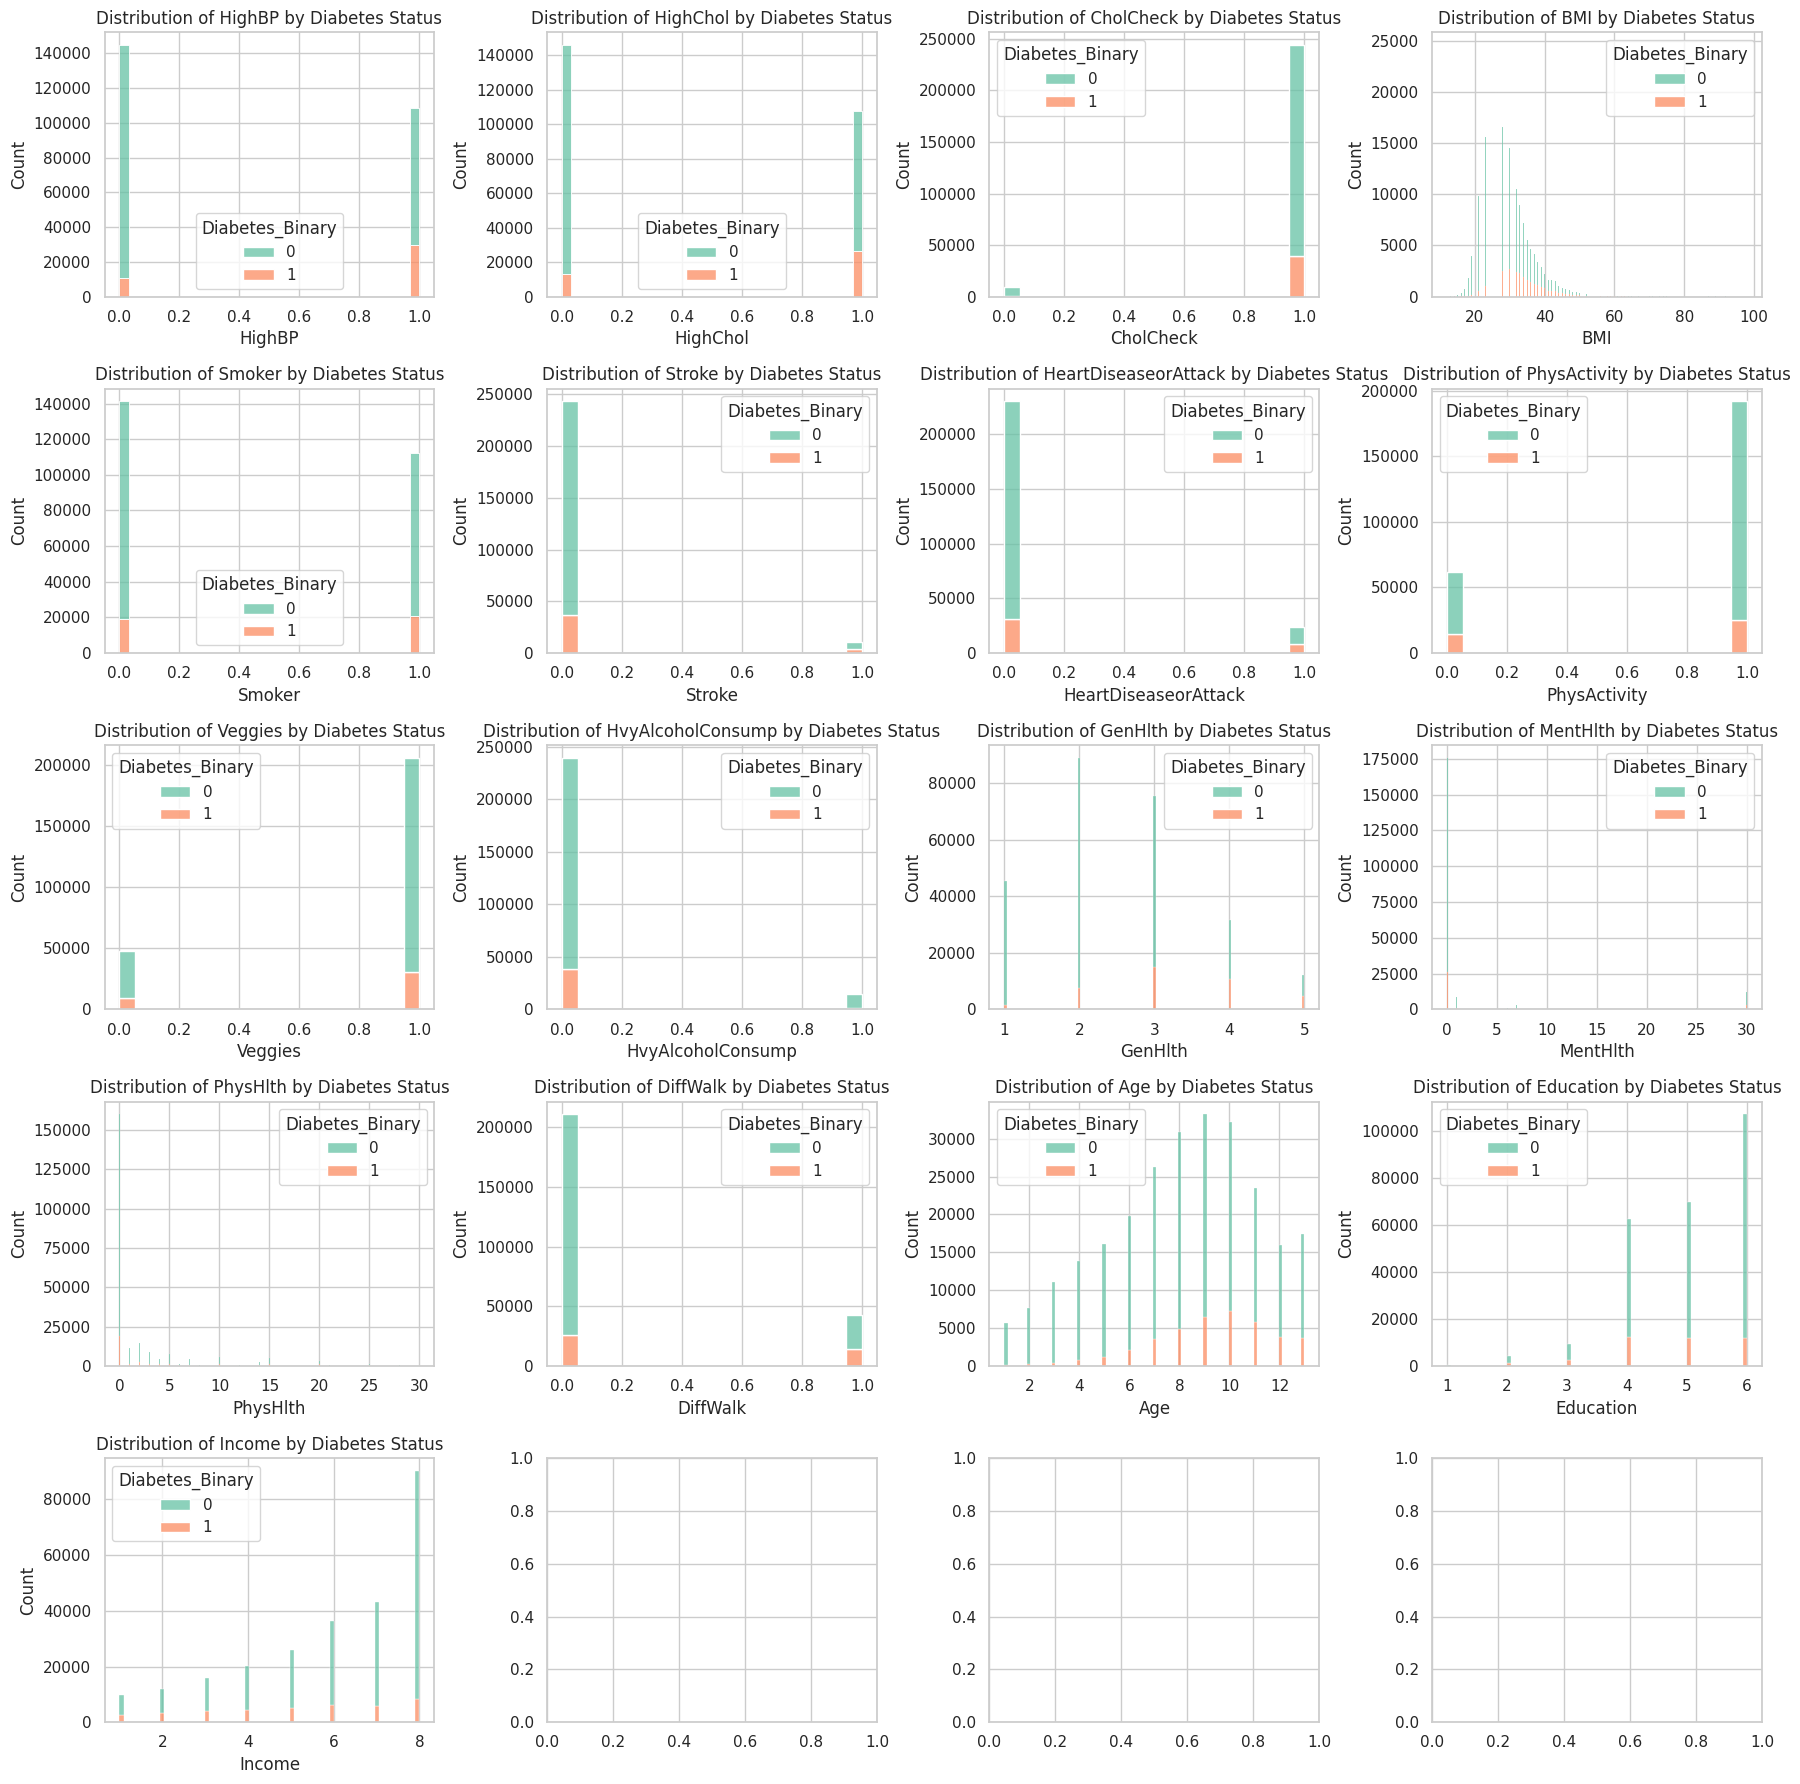

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Define the features to be analyzed
features = df_filtered

# Create a plot for each feature
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 18))

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='Diabetes_Binary', multiple='stack', kde=False, palette="Set2", ax=axes.flat[i])
    axes.flat[i].set_title(f"Distribution of {feature} by Diabetes Status")
    axes.flat[i].set_xlabel(f"{feature}")
    axes.flat[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

***
## **Step 7** 
### **Histogram Comparison Before and After Standardization**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def plot_and_standardize_column(df, column_name):
    """
    This function displays the histogram of a column before and after standardization
    and standardizes the column.

    :param df: DataFrame
    :param column_name: The name of the column to be standardized (string)
    :return: DataFrame with the standardized column
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    # Display histogram before standardization
    df_copy.hist(column=column_name, ax=axes[0], bins=20)
    axes[0].set_title(f'Histogram of {column_name} before Standardization')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    
    # Standardize the column
    scaler = StandardScaler()
    df_copy[column_name] = scaler.fit_transform(df_copy[[column_name]])
    
    # Display histogram after standardization
    df_copy.hist(column=column_name, ax=axes[1], bins=20)
    axes[1].set_title(f'Histogram of {column_name} after Standardization')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Frequency')
    
    # Adjust layout to make sure everything fits
    plt.tight_layout()
    plt.show()
    
    return df_copy

*** 

### **Standardization of BMI**

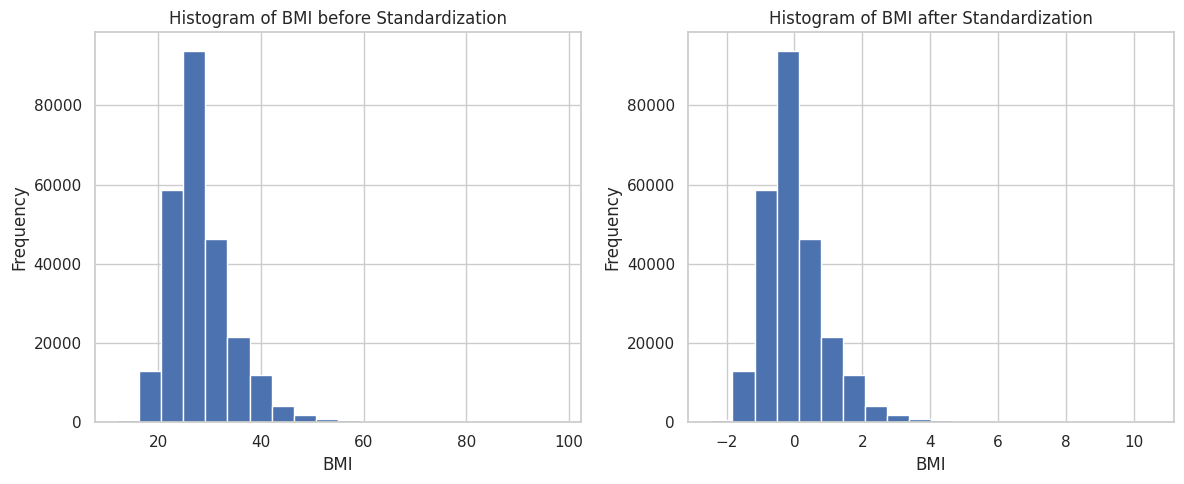

In [17]:
df = plot_and_standardize_column(df, "BMI")

*** 

### **Standardization of GenHlth**

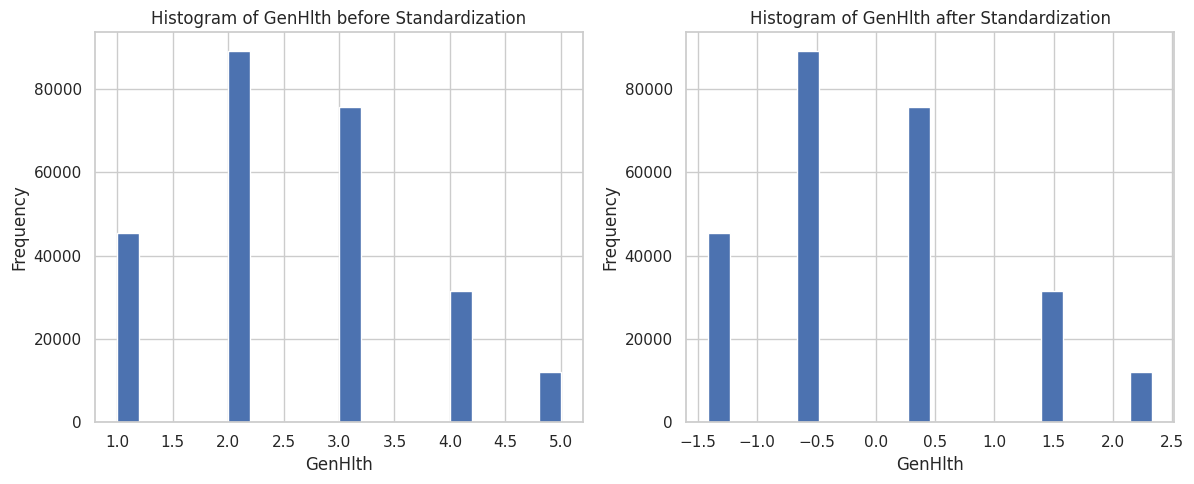

In [18]:
df = plot_and_standardize_column(df, "GenHlth")

*** 

### **Standardizing of MentHlth**

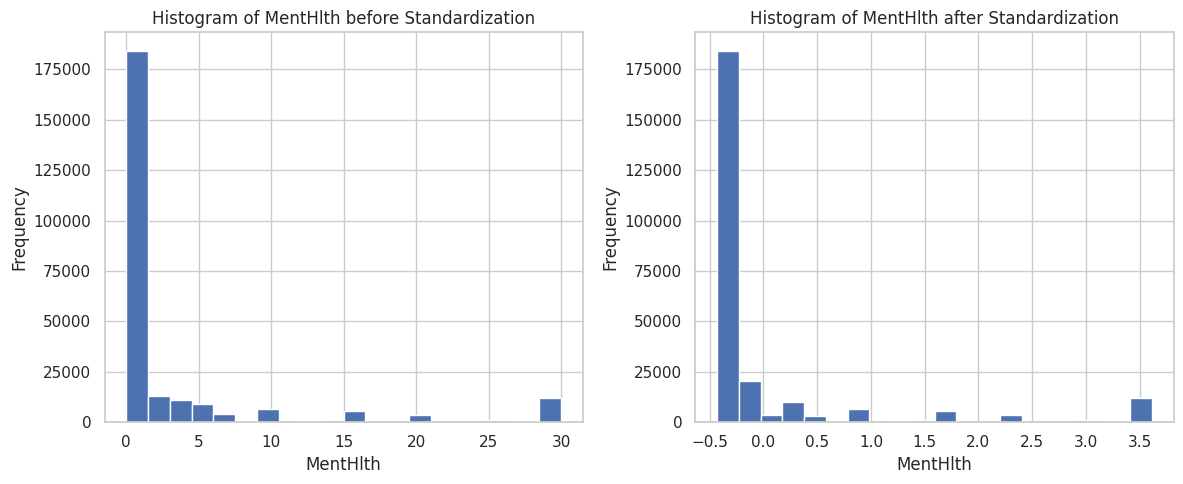

In [19]:
df = plot_and_standardize_column(df, "MentHlth")

*** 

<h2 style="align: center; text-align: center"> PhysHlth Standardizing </h2>

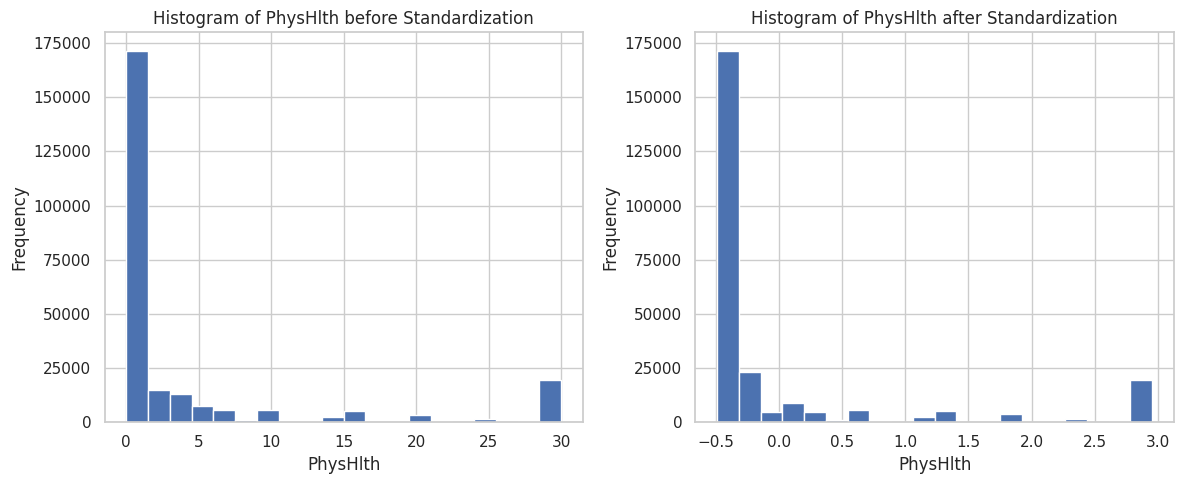

In [20]:
df = plot_and_standardize_column(df, "PhysHlth")

*** 

<h2 style="align: center; text-align: center"> Age Standardizing </h2>

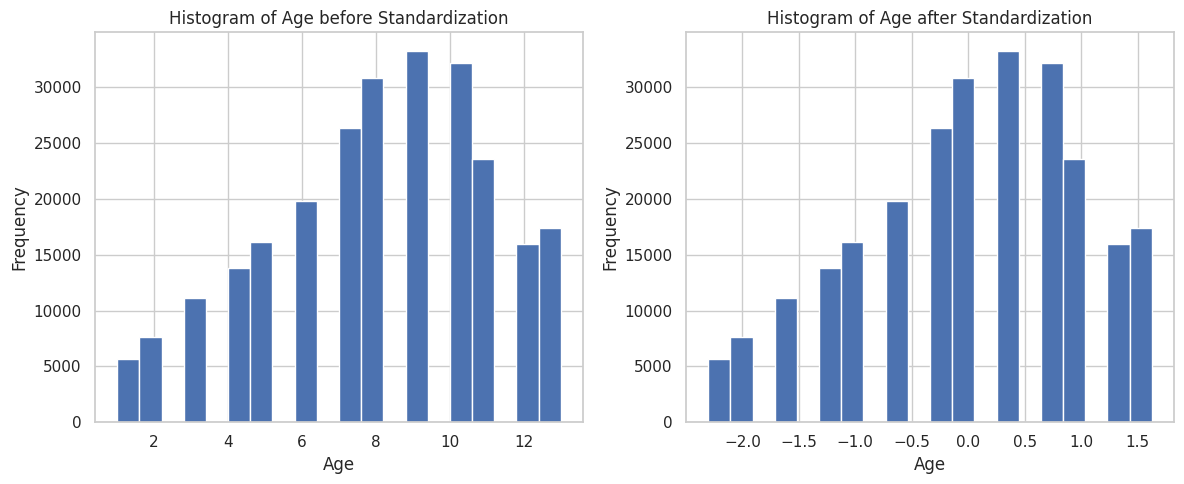

In [21]:
df = plot_and_standardize_column(df, "Age")

***
## **Step 8** 
### **One-Hot Encoding and Integrating (Encoding Gender for Analysis of Its Impact on the Dataset)**

### Description:
This code focuses on processing the `Sex` column to evaluate its impact on the dataset. It performs the following steps:
1. **Distribution Analysis**: Displays the distribution of gender values in the dataset to understand the gender distribution.
2. **One-Hot Encoding**: Converts the `Sex` column into a binary format using one-hot encoding. This is done to transform categorical gender data into numerical form suitable for machine learning models.
3. **Integration**: Merges the one-hot encoded gender data back into the original dataset, while removing the original `Sex` column to avoid redundancy.

This preprocessing helps in analyzing how gender affects other features or the target variable in the dataset by transforming it into a format that can be effectively used in statistical analysis or machine learning models.

In [22]:
import pandas as pd

# Displaying the distribution of genders
print(df["Sex"].value_counts(normalize=True))

# Applying One-Hot Encoding to the 'Sex' column
df_encoded = pd.get_dummies(df, columns=["Sex"], drop_first=True)

Sex
0.00   0.56
1.00   0.44
Name: proportion, dtype: float64


***
## **Step 9** 
### **Splitting Data, Applying SMOTE for Class Balancing, and Optional Validation Split**


### Explanation
This code snippet demonstrates how to balance an imbalanced dataset using Synthetic Minority Over-sampling Technique (SMOTE). 

1. **Data Separation**: It separates the features (`X`) from the target variable (`y`), where `y` is the binary classification target (`Diabetes_Binary`).
   
2. **Train-Test Split**: The dataset is divided into training and testing sets, with 80% of the data allocated for training and 20% for testing. The `stratify=y` parameter ensures that the class distribution in the training and testing sets is proportional to the original dataset.

3. **Applying SMOTE**: SMOTE is applied to the training set to create synthetic samples of the minority class, thus balancing the class distribution in the training data.

4. **Distribution Check**: The distribution of the target variable in the resampled training set is printed to verify the balancing effect.

In [23]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['Diabetes_012', 'Diabetes_Binary'])
y = df['Diabetes_Binary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
print(y_train_resampled.value_counts(normalize=True) * 100)

Diabetes_Binary
1   50.00
0   50.00
Name: proportion, dtype: float64


***
## **Step 10** 
### **Enhanced Logistic Regression with Extended Iterations and F1-Score Evaluation**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Increasing the number of iterations for better convergence
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "solver": ["saga"],
    "max_iter": [500, 1000, 1500],  
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    refit=True,
    n_jobs=-1,
    verbose=1,
)

# Training the model
grid_search.fit(X_train, y_train)

# Displaying the best parameters found by grid search
print("Best parameters: ", grid_search.best_params_)

# Using the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculating F1-score for the test data
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1-score on test set: {f1:.2f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'C': 10.0, 'fit_intercept': True, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'saga'}
F1-score on test set: 0.82


***
## **Step 11** 
### **Impact Analysis of Features on Diabetes Prediction: Key Factors and Their Influences**

In [25]:
import pandas as pd

# Extracting coefficients and feature names
coefficients = best_model.coef_[0]
feature_names = X.columns

# Combining feature names and coefficients into a DataFrame
feature_coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting by the absolute value of coefficients in descending order
feature_coefficients_df['Absolute Coefficient'] = feature_coefficients_df['Coefficient'].abs()
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying the results without the index
print(feature_coefficients_df[['Feature', 'Coefficient']].to_string(index=False))

             Feature  Coefficient
           CholCheck         1.20
              HighBP         0.71
   HvyAlcoholConsump        -0.66
            HighChol         0.59
             GenHlth         0.55
                 BMI         0.41
                 Age         0.39
                 Sex         0.24
HeartDiseaseorAttack         0.20
            DiffWalk         0.10
              Stroke         0.07
         NoDocbcCost         0.07
            PhysHlth        -0.06
       AnyHealthcare         0.06
              Income        -0.06
        PhysActivity        -0.05
              Fruits        -0.05
           Education        -0.04
             Veggies        -0.03
              Smoker        -0.02
            MentHlth        -0.01


***
## **Step 12** 
### **Impact Analysis of Features on Diabetes Prediction: Key Factors and Their Influences**

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'Diabetes' is the target variable and the rest are features
# Replace 'Diabetes' with the actual column name for the target variable in your dataset
X = df.drop(columns=['Diabetes_012', 'Diabetes_Binary'])  # Features
y = df['Diabetes_Binary']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters and their values for the grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear']  # Solver for small datasets and for L1 penalty
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Set up the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the final model on the test set
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
final_class_report = classification_report(y_test, y_pred_best)

print(f"Final Test Accuracy: {final_accuracy:.2f}")
print("Final Classification Report:\n", final_class_report)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.75
Final Test Accuracy: 0.73
Final Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.82     42741
           1       0.34      0.75      0.47      7995

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736



In [29]:
# Select features with a correlation higher than a threshold value (e.g., 0.1)
important_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()

# Create a new DataFrame with the important features
df_important = df[important_features]

print("Selected Important Features:\n", important_features)

Selected Important Features:
 ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Diabetes_Binary']


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation of features with the target variable
target_correlation = correlation_matrix['Diabetes_Binary'].sort_values(ascending=False)

print(target_correlation)

Diabetes_Binary         1.00
Diabetes_012            0.98
GenHlth                 0.30
HighBP                  0.27
BMI                     0.22
DiffWalk                0.22
HighChol                0.21
Age                     0.19
HeartDiseaseorAttack    0.18
PhysHlth                0.17
Stroke                  0.10
MentHlth                0.07
CholCheck               0.07
Smoker                  0.06
NoDocbcCost             0.04
Sex                     0.03
AnyHealthcare           0.01
Fruits                 -0.04
HvyAlcoholConsump      -0.06
Veggies                -0.06
PhysActivity           -0.12
Education              -0.13
Income                 -0.17
Name: Diabetes_Binary, dtype: float64


In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X = df_important.drop('Diabetes_012', axis=1)
y = df_important['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SMOTE to address the class imbalance issue
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create models using OneVsRestClassifier for logistic regression
models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear')),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64180
         1.0       0.16      0.60      0.26      1425
         2.0       0.92      0.58      0.71     10499

    accuracy                           0.93     76104
   macro avg       0.69      0.73      0.66     76104
weighted avg       0.97      0.93      0.95     76104

------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64180
         1.0       0.13      0.15      0.14      1425
         2.0       0.88      0.86      0.87     10499

    accuracy                           0.97     76104
   macro avg       0.67      0.67      0.67     76104
weighted avg       0.97      0.97      0.97     76104

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   s

Top 10 Important Features:
                Feature  Importance
2                   BMI        0.18
8                   Age        0.13
6              PhysHlth        0.08
5               GenHlth        0.05
0                HighBP        0.03
1              HighChol        0.02
7              DiffWalk        0.02
4  HeartDiseaseorAttack        0.01
3                Stroke        0.01


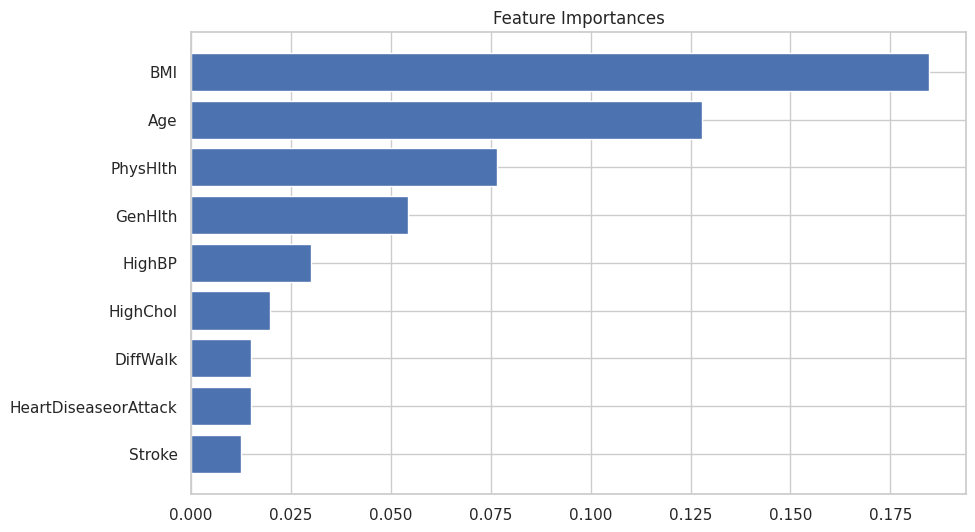

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Retrain the RandomForest model with all training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X_train_smote.columns  # Ensure this matches the training data

# Create a DataFrame from feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Filter out the 'Diabetes_Binary' feature
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Diabetes_Binary']

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.show()

In [35]:
# Create a new dataset using the important features
important_features = ['BMI', 'Age', 'GenHlth', 'HighBP', 'PhysHlth', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Stroke']

X_important = df_important[important_features]
y = df_important['Diabetes_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42)

# Use SMOTE to address the class imbalance issue
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [36]:
# Create models using OneVsRestClassifier for Logistic Regression
models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear')),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     64180
           1       0.34      0.76      0.47     11924

    accuracy                           0.73     76104
   macro avg       0.64      0.74      0.64     76104
weighted avg       0.85      0.73      0.76     76104

--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     64180
           1       0.33      0.40      0.36     11924

    accuracy                           0.78     76104
   macro avg       0.61      0.63      0.61     76104
weighted avg       0.80      0.78      0.79     76104

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     64180
           1       0.34      0.44      0.39     11924

    accurac

In [37]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define a smaller parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Reduced range
    'max_depth': [10, 15, 20],  # Reduced range
    'min_samples_split': [2, 5, 10],  # Reduced range
    'min_samples_leaf': [1, 2, 4]  # Reduced range
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,  # Set to 1 or 0 to reduce output
    n_iter=10,  # Number of parameter settings sampled
    random_state=42
)

# Measure the time taken for fitting
start_time = time.time()

# Fit the model
random_search.fit(X_train_smote, y_train_smote)

end_time = time.time()

print(f"Randomized search took {(end_time - start_time):.2f} seconds")

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print(f"Best accuracy found: {random_search.best_score_:.2f}")

# Train the model with the best parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Model: Tuned Random Forest")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Randomized search took 328.64 seconds
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best accuracy found: 0.83
Model: Tuned Random Forest
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     64180
           1       0.36      0.57      0.44     11924

    accuracy                           0.78     76104
   macro avg       0.64      0.69      0.65     76104
weighted avg       0.82      0.78      0.79     76104



In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the XGBClassifier
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Fit the model with the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report for XGBoost
print("Model: XGBoost")
print(classification_report(y_test, y_pred_xgb))

Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     64180
           1       0.56      0.19      0.28     11924

    accuracy                           0.85     76104
   macro avg       0.71      0.58      0.60     76104
weighted avg       0.82      0.85      0.82     76104



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("Model: Tuned Random Forest with SMOTE")
print(classification_report(y_test, y_pred_rf))

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("Model: XGBoost with SMOTE")
print(classification_report(y_test, y_pred_xgb))

NameError: name 'X' is not defined

***
## **Step 20** 
### **Support Vector Machines (SVM)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define a pipeline for standardizing the data and training the SVM model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', SVC(kernel='rbf', random_state=42))  # SVM model
])

# Train the model using the pipeline
pipeline.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Model: SVM with Standardization")
print(classification_report(y_test, y_pred))

NameError: name 'X' is not defined

In [41]:
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the SVM model
svm = SVC(probability=True, random_state=42)

# Set hyperparameters for Randomized Search
param_dist = {
    'C': [0.1, 1, 10],  # Reduce the number of C values
    'gamma': [0.1, 0.01],  # Reduce the number of gamma values
    'kernel': ['rbf']  # Use RBF kernel
}

# Use Randomized Search to find the best hyperparameters
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=5, cv=3, verbose=2, random_state=42, n_jobs=2)  # Reduce n_jobs to 2
svm_random.fit(X_train_scaled, y_train_resampled)

# Display the best hyperparameters
print(f"Best parameters found: {svm_random.best_params_}")

# Predict and evaluate the model
y_pred = svm_random.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


KeyboardInterrupt: 

In [34]:
# Best trained model
best_svm = svm_random.best_estimator_

# Predict on the test data
y_pred_svm = best_svm.predict(X_test_scaled)

# Model evaluation report
print("Model: Tuned SVM")
print(classification_report(y_test, y_pred_svm))

Model: Tuned SVM
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42795
         1.0       1.00      1.00      1.00      7941

    accuracy                           1.00     50736
   macro avg       1.00      1.00      1.00     50736
weighted avg       1.00      1.00      1.00     50736



ROC-AUC Score: 1.0000


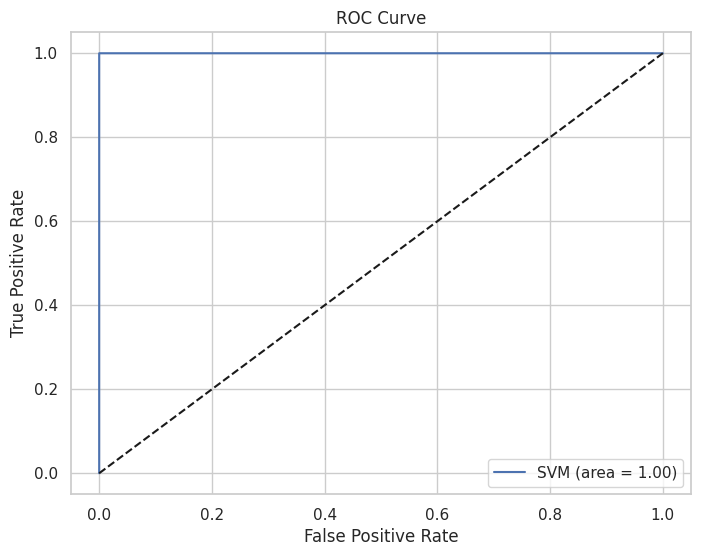

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute probabilities for the positive class
y_probs_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_svm)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

***
## **Step 20** 
### **Support Vector Machines (SVM)**

In [36]:
import pandas as pd

# Data for yourself and some friends
data = {
    'Age': [36, 28, 45],  # Example ages
    'BMI': [25.6, 30.2, 22.8],  # Example BMI values
    'HighBP': [1, 0, 1],  # High blood pressure (1 = Yes, 0 = No)
    'HighChol': [1, 1, 0],  # High cholesterol (1 = Yes, 0 = No)
    'GenHlth': [3, 4, 5],  # General health status (1 to 5)
    'PhysHlth': [2, 5, 0],  # Number of days physical health was not good
    'DiffWalk': [0, 0, 0],  # Difficulty walking (1 = Yes, 0 = No)
    'HeartDiseaseorAttack': [0, 1, 0],  # History of heart disease or attack
    'Stroke': [0, 0, 0]  # History of stroke (1 = Yes, 0 = No)
}

# Create a DataFrame for new data
new_data = pd.DataFrame(data)

In [37]:
# Ensure that the columns in new_data match those in X_train
new_data = new_data[X_train.columns]

# Apply StandardScaler
new_data_scaled = scaler.transform(new_data)

KeyError: "['Diabetes_Binary'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume scaler has been fitted on training data
scaler = StandardScaler()

# Fit scaler on the training data and transform new data accordingly
scaler.fit(X_train)  # Fitting scaler on training data (if not already fitted)
new_data_scaled = scaler.transform(new_data)

In [76]:
# Use the trained model to predict
predictions = svm_random.predict(new_data_scaled)

# Print the predictions
print("Predicted diabetes risk for each individual:", predictions)

Predicted diabetes risk for each individual: [0. 0. 0.]


In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df)